# Scikit-Learn

## Exploratory analysis

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

In [2]:

if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.1.3

1.1.3


---

### Exploration with pandas

#### Create the `DataFrame`

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Features:

* `age`: age in years
* `sex`
* `bmi`: body mass index
* `bp`: average blood pressure
* `s1`: tc, total serum cholesterol
* `s2`: ldl, low-density lipoproteins
* `s3`: hdl, high-density lipoproteins
* `s4`: tch, total cholesterol / HDL
* `s5`: ltg, possibly log of serum triglycerides level
* `s6`: glu, blood sugar level

Target:

* Quantitative measure of disease progression one year after baseline

In [3]:
diabetes = datasets.load_diabetes()

# adding all the features to data frame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### Descriptions

In [4]:
with pd.option_context("display.float_format", "{:.3g}".format):
    display(df.describe())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442,442,442,442,442,442,442,442,442,442,442
mean,-2.51e-19,1.23e-17,-2.25e-16,-4.8e-17,-1.38e-17,3.92e-17,-5.78e-18,-9.04e-18,9.29e-17,1.13e-17,152
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.1
min,-0.107,-0.0446,-0.0903,-0.112,-0.127,-0.116,-0.102,-0.0764,-0.126,-0.138,25
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87
50%,0.00538,-0.0446,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,212
max,0.111,0.0507,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346


#### Investigate correlations

Quickly display a correlation table with [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [5]:
corr_df = df.corr()

with pd.option_context("display.float_format", "{:.2g}".format):
    display(corr_df)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1,0.17,0.19,0.34,0.26,0.22,-0.075,0.2,0.27,0.3,0.19
sex,0.17,1,0.088,0.24,0.035,0.14,-0.38,0.33,0.15,0.21,0.043
bmi,0.19,0.088,1,0.4,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.4,1,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.035,0.25,0.24,1,0.9,0.052,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.9,1,-0.2,0.66,0.32,0.29,0.17
s3,-0.075,-0.38,-0.37,-0.18,0.052,-0.2,1,-0.74,-0.4,-0.27,-0.39
s4,0.2,0.33,0.41,0.26,0.54,0.66,-0.74,1,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.4,0.62,1,0.46,0.57
s6,0.3,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1,0.38


Display the table as a heatmap with [`DataFrame.style.Styler.background_gradient`](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html).

In this case, it seems appropriate to take a double coloring scheme (e.g., positive in green and negative in pink) to highlight both the absolute value of the correlations and their polarity.

In [6]:
# Requirement: !conda install Jinja2

corr_df.style.background_gradient(cmap="PiYG", vmin=-1).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


#### Graph in Pandas

It is possible to build graphs very easily from pandas `DataFrame` which provides access to the Matplotlib API, e.g., with [`DataFrame.hist`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).

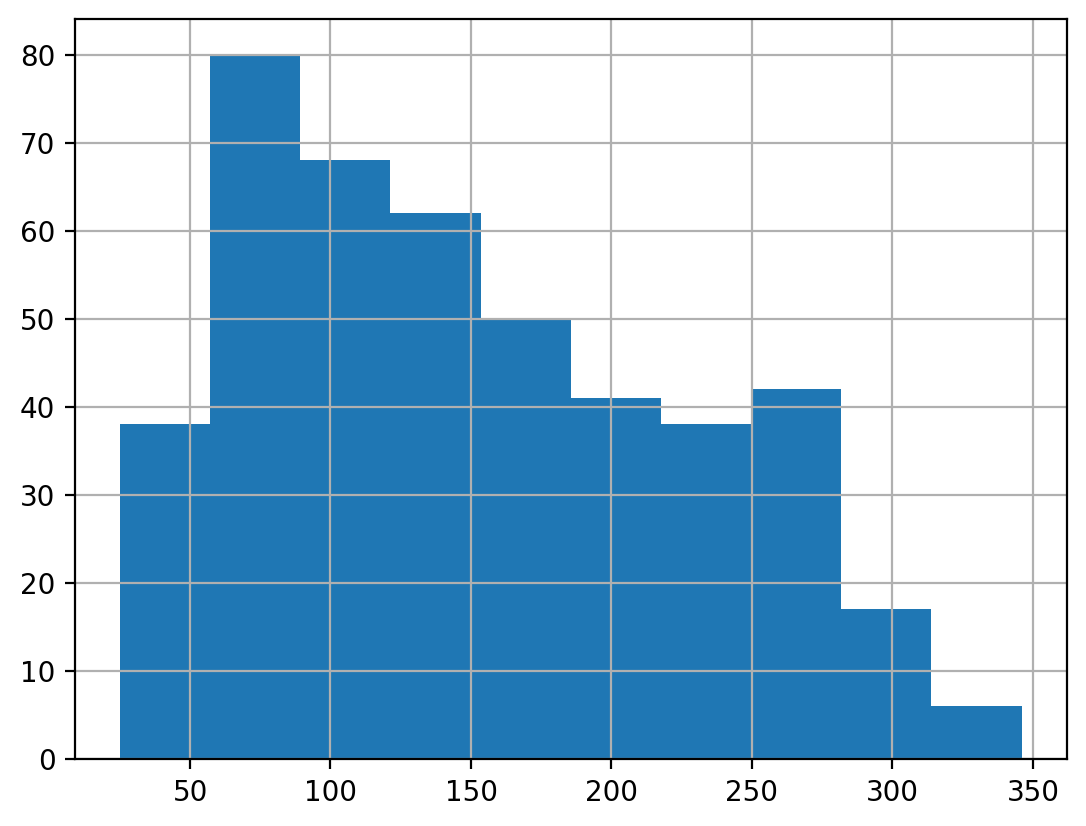

In [7]:
df["target"].hist()
plt.show()

#### Scatter matrix

Another way to visualize the correlation between descriptors is via the [`pandas.plotting.scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) function, which plots each feature against every others (scatter plots).

Since we have 10 features here, we will end up with $10 \times 10 = 100$ scatter plots, which wouldn't be readable on a page, so let's just focus on a few of them.

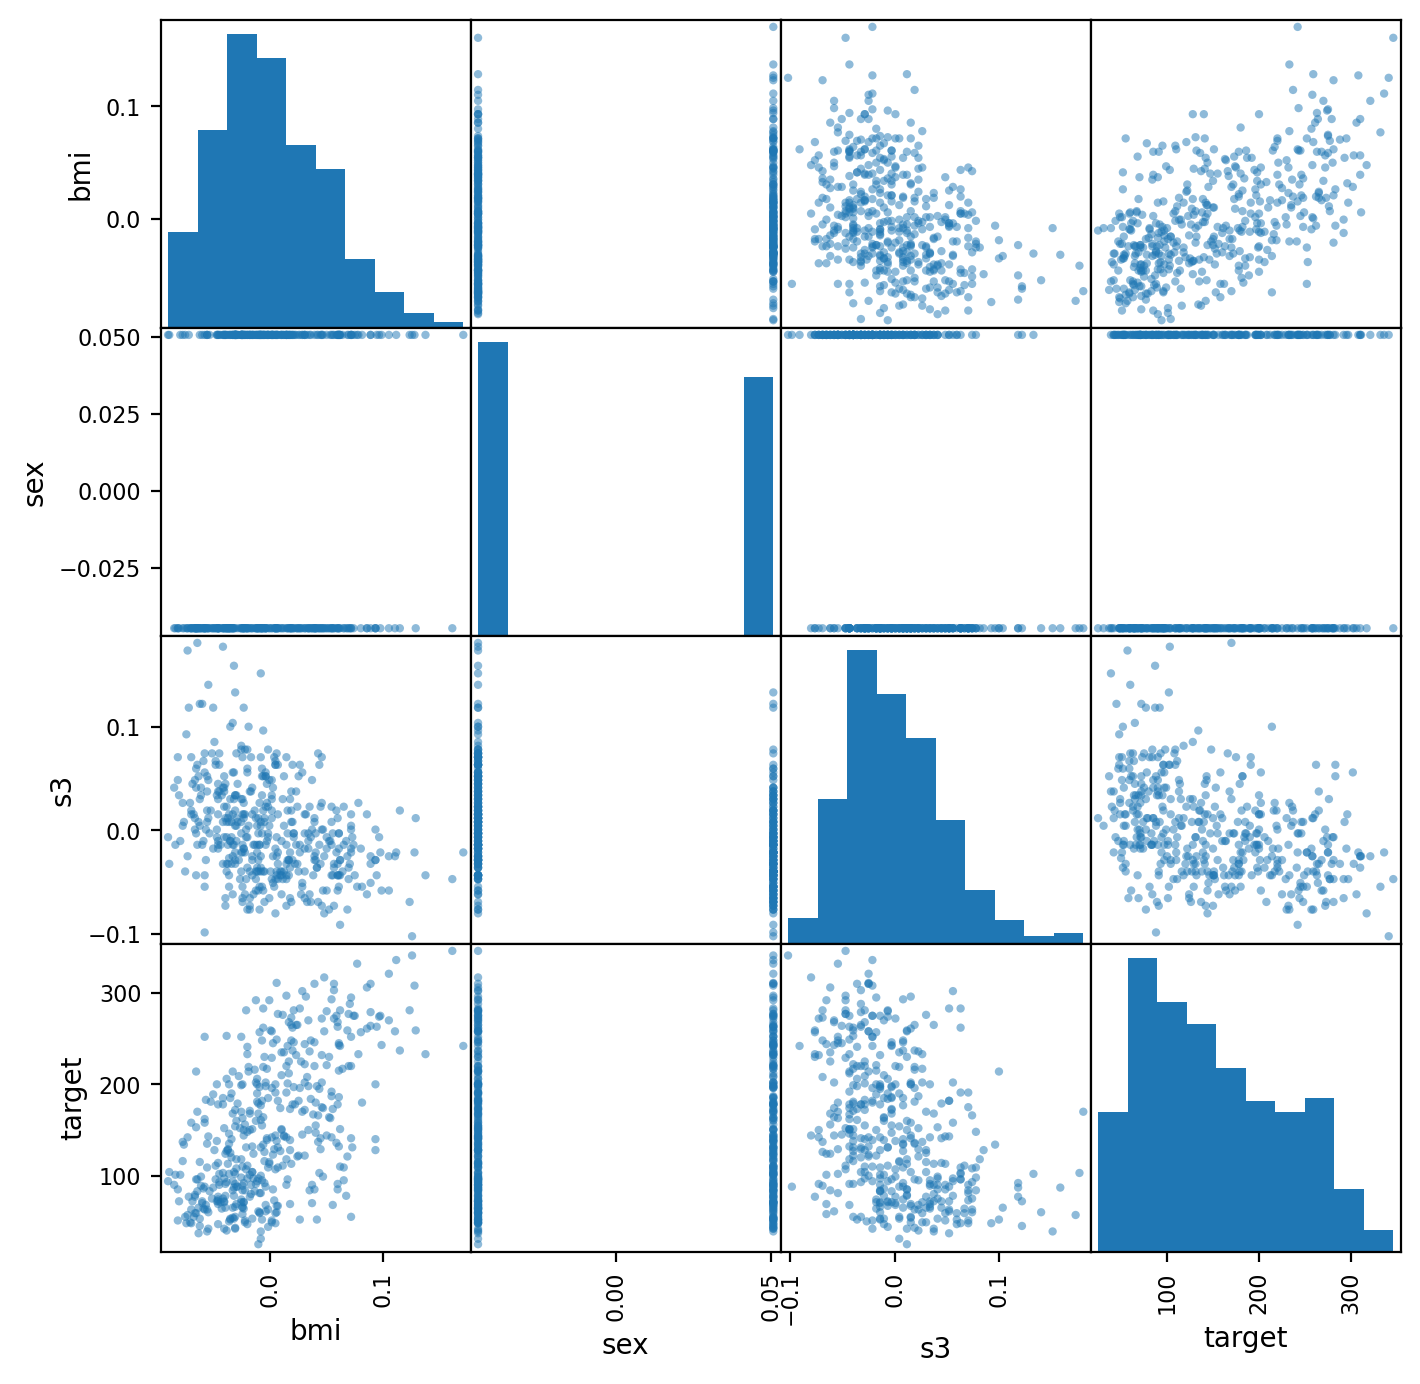

In [8]:
FTS = ["bmi", "sex", "s3", "target"]
pd.plotting.scatter_matrix(df[FTS], figsize=(8, 8))
plt.show()

*   We can see that `target` is positively correlated with `bmi`, and negatively with `s3`. 

*   The `scatter_matrix` method returns a histogram of all features in its diagonal plots

*   Note: Binary features are hard to visualize on scatter plots (`sex`)

---

### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [9]:
digits = datasets.load_digits()

In [10]:
digits.target[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [11]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


Randomly select the training and test dataset.

<span style="color:red">Implement your solution below and comment briefly</span>

In [12]:
xs_train, xs_test, ys_train, ys_test = model_selection.train_test_split(
    data, digits.target, random_state=1
)

print(ys_train.shape, xs_train.shape)
print(ys_test.shape, xs_test.shape)

(1347,) (1347, 64)
(450,) (450, 64)


#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implement your solution below</span>

In [13]:
# 2. Instantiation
model = naive_bayes.GaussianNB()

# 3. Learn (fit) the model
model.fit(xs_train, ys_train)

# 4. Predict on new data
ys_pred = model.predict(xs_test)

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implement your solution below</span>

In [14]:
score = metrics.accuracy_score(ys_test, ys_pred)
print(f"{score :.03f}")

0.853


In [15]:
print(metrics.classification_report(ys_test, ys_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.81      0.81      0.81        42
           2       0.93      0.66      0.77        41
           3       0.93      0.77      0.84        52
           4       0.93      0.91      0.92        47
           5       0.94      0.85      0.89        39
           6       0.96      1.00      0.98        43
           7       0.80      1.00      0.89        48
           8       0.51      0.95      0.67        37
           9       1.00      0.62      0.77        48

    accuracy                           0.85       450
   macro avg       0.88      0.85      0.85       450
weighted avg       0.89      0.85      0.86       450



In [16]:
scores_dic = metrics.classification_report(ys_test, ys_pred, output_dict=True)
scores_df = pd.DataFrame(scores_dic)
scores_df

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.980769,0.809524,0.931034,0.930233,0.934783,0.942857,0.955556,0.800000,0.514706,1.000000,0.853333,0.879946,0.888366
recall,0.962264,0.809524,0.658537,0.769231,0.914894,0.846154,1.000000,1.000000,0.945946,0.625000,0.853333,0.853155,0.853333
f1-score,0.971429,0.809524,0.771429,0.842105,0.924731,0.891892,0.977273,0.888889,0.666667,0.769231,0.853333,0.851317,0.856509
support,53.000000,42.000000,41.000000,52.000000,47.000000,39.000000,43.000000,48.000000,37.000000,48.000000,0.853333,450.000000,450.000000


In [17]:
scores_dic = metrics.classification_report(ys_test, ys_pred, output_dict=True)
scores_df = pd.DataFrame(scores_dic).transpose()  # .style.set_precision(2)

with pd.option_context("display.float_format", "{:.3g}".format):
    display(scores_df)

,precision,recall,f1-score,support
0,0.981,0.962,0.971,53
1,0.81,0.81,0.81,42
2,0.931,0.659,0.771,41
3,0.93,0.769,0.842,52
4,0.935,0.915,0.925,47
5,0.943,0.846,0.892,39
6,0.956,1,0.977,43
7,0.8,1,0.889,48
8,0.515,0.946,0.667,37
9,1,0.625,0.769,48


In [18]:
scores_df["precision"]

0               0.980769
1               0.809524
2               0.931034
3               0.930233
4               0.934783
5               0.942857
6               0.955556
7               0.800000
8               0.514706
9               1.000000
accuracy        0.853333
macro avg       0.879946
weighted avg    0.888366
Name: precision, dtype: float64

#### Confusion matrix

Use the method [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the object returned by this method allows to obtain the confusion matrix in the form of an array.

<span style="color:red">Implement your solution below and comment briefly</span>

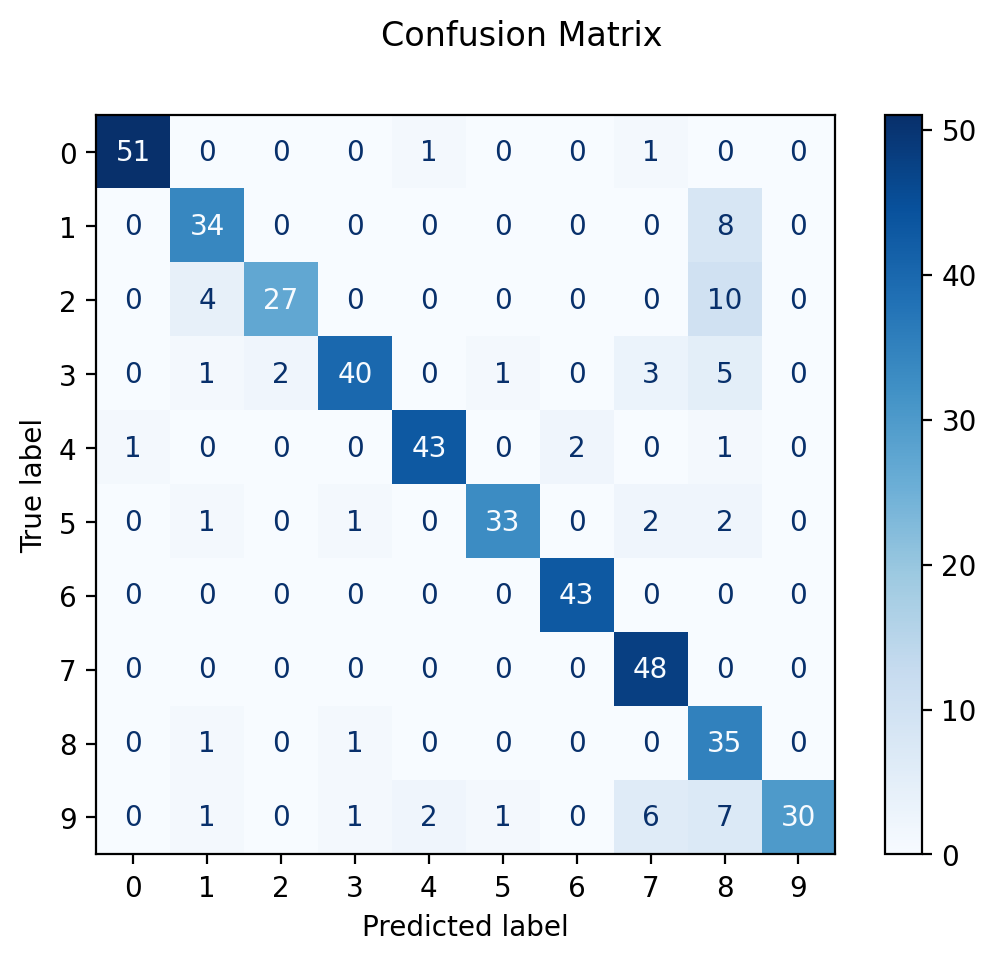

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    model, xs_test, ys_test, cmap=plt.cm.Blues
)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [20]:
print(f"Confusion matrix:\n\n{disp.confusion_matrix}")

Confusion matrix:

[[51  0  0  0  1  0  0  1  0  0]
 [ 0 34  0  0  0  0  0  0  8  0]
 [ 0  4 27  0  0  0  0  0 10  0]
 [ 0  1  2 40  0  1  0  3  5  0]
 [ 1  0  0  0 43  0  2  0  1  0]
 [ 0  1  0  1  0 33  0  2  2  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  0  0 35  0]
 [ 0  1  0  1  2  1  0  6  7 30]]


#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

Identifiez les cas les plus confus.

Identifiez les instances mal classées pour la classe de chiffre au f1-score le plus faible et visualisez les avec le code ci-dessous.

Vous pouvez utiliser la fonction [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) pour trouver l'index des instances en question.

<span style="color:red">Implement your solution below and comment briefly</span>

In [21]:
(indexes,) = np.where((ys_test == 1) & (ys_test != ys_pred))
indexes

array([ 21,  65, 114, 203, 270, 333, 371, 416])

In [22]:
def plot_digit(xs, ys, idx):
    print(f"Digit value: {ys[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs[idx].reshape([8, 8]),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )

Digit value: 1


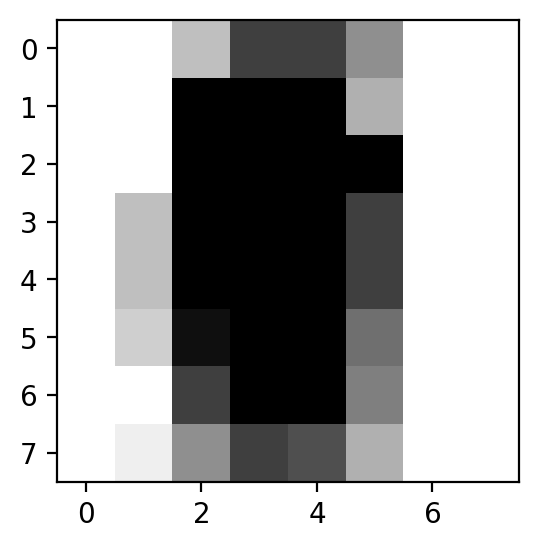

In [23]:
plot_digit(xs=xs_test, ys=ys_test, idx=21)

---

### PCA

Try to reduce the number of features through the ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), by choosing, e.g., the 10 first principal components.

#### PCA and training/evaluation data selection

<span style="color:red">Implement your solution below and comment briefly</span>

In [24]:
N_COMP = 10

pca = decomposition.PCA(n_components=N_COMP)
xps_train = pca.fit_transform(xs_train)
xps_test = pca.transform(xs_test)

print(xs_train.shape, xs_test.shape)
print(xps_train.shape, xps_test.shape)

(1347, 64) (450, 64)
(1347, 10) (450, 10)


#### Model training

<span style="color:red">Implement your solution below and comment briefly</span>

In [25]:
# 2. Instantiation
model = naive_bayes.GaussianNB()

# 3. Learn (fit) the model
model.fit(xps_train, ys_train)

# 4. Predict on new data
yps_pred = model.predict(xps_test)

#### Evaluation

<span style="color:red">Implement your solution below and comment briefly</span>

In [26]:
score = metrics.accuracy_score(ys_test, yps_pred)
print(f"{score :.03f}")

print(metrics.classification_report(ys_test, yps_pred))

0.911
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.73      0.88      0.80        42
           2       0.95      0.85      0.90        41
           3       0.96      0.83      0.89        52
           4       0.98      1.00      0.99        47
           5       0.88      0.95      0.91        39
           6       1.00      1.00      1.00        43
           7       0.90      0.96      0.93        48
           8       0.86      0.81      0.83        37
           9       0.88      0.88      0.88        48

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.92      0.91      0.91       450



---

### Cross-Validation

![](img/grid_search_cross_validation.png)

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

<span style="color:red">Implement your solution below and comment briefly</span>

In [27]:
SCORINGS = "f1_weighted"

xps = np.vstack([xps_train, xps_test])
yps = np.hstack([ys_train, ys_test])

scores = model_selection.cross_val_score(
    model, xps, yps, cv=10, scoring=SCORINGS
)
print(scores)

print(f"\n{SCORINGS}: {scores.mean():.3f}, with std dev: {scores.std():.3f}\n")

[0.94405607 0.89645321 0.88335747 0.89210919 0.94032719 0.88795071
 0.91874958 0.895143   0.91127911 0.90996237]

f1_weighted: 0.908, with std dev: 0.020



Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

<span style="color:red">Implement your solution below and comment briefly</span>

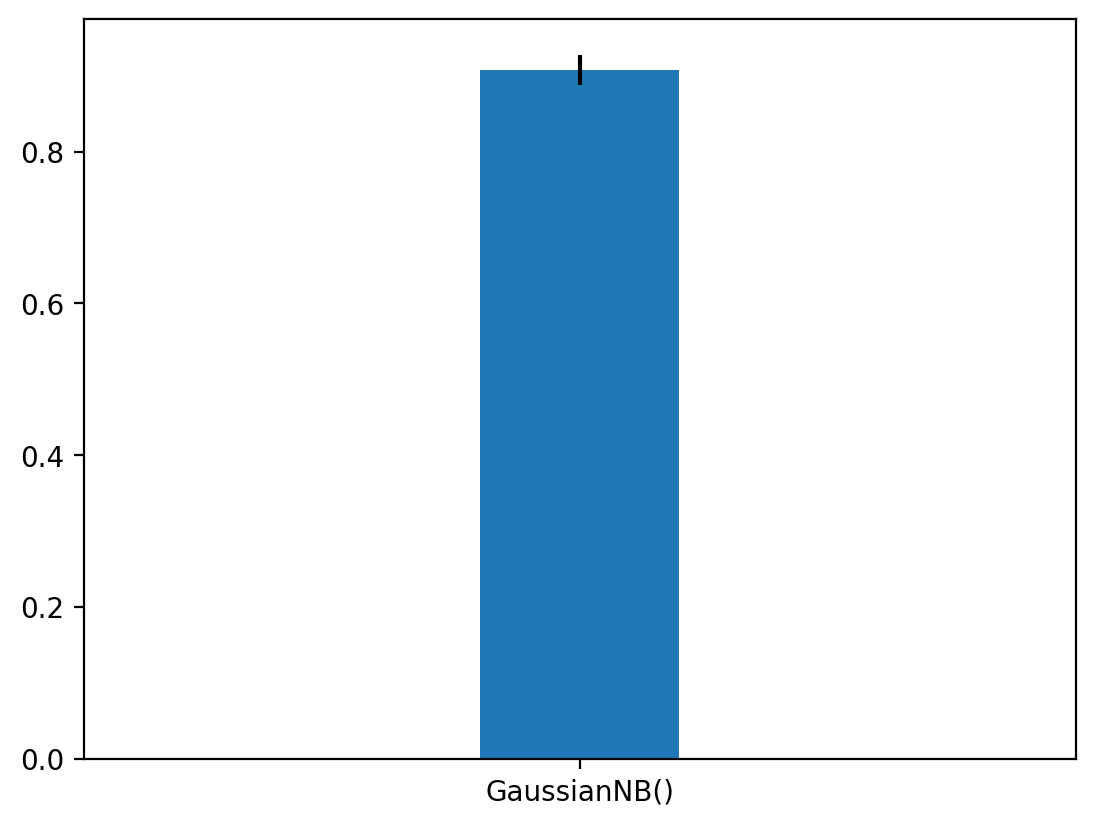

In [28]:
plt.bar([str(model)], scores.mean(), yerr=scores.std())
plt.xlim(-2, 2)
plt.show()

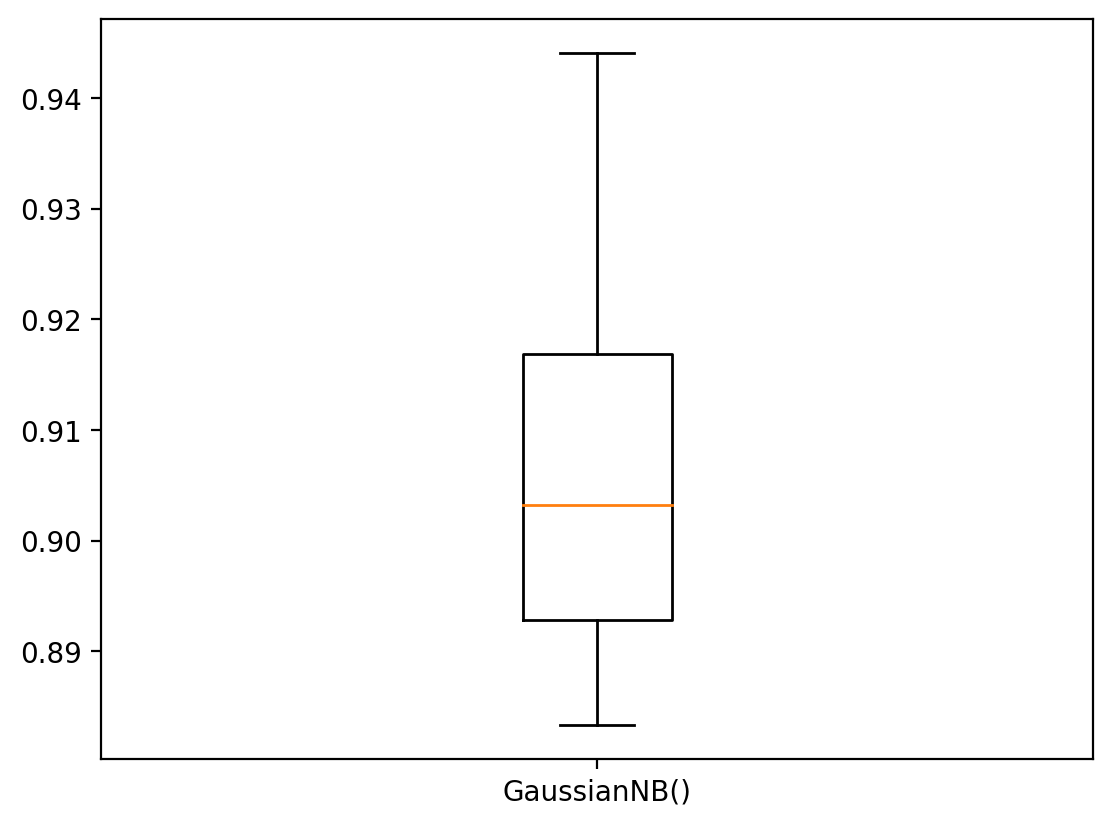

In [29]:
plt.boxplot(scores)
plt.xticks([1], [str(model)])
plt.show()

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

In [30]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

<span style="color:red">Implement your solution below and comment briefly</span>

In [31]:
# Define the pipeline

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = decomposition.PCA()
model = naive_bayes.GaussianNB()
pipe = pipeline.Pipeline(steps=[("pca", pca), ("model", model)])

In [32]:
# Define the gridsearch using the pipeline and fit the model

# Parameters of pipelines can be set using ‘__’ separated parameter names:

search = model_selection.GridSearchCV(
    pipe, param_grid, n_jobs=-1, scoring=SCORINGS, verbose=1, cv=10
)

search.fit(data, digits.target)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]},
             scoring='f1_weighted', verbose=1)

In [33]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value

print(f"Best parameter (CV score: {search.best_score_:.3f})")

print(search.best_params_)

cv_results_df = pd.DataFrame(search.cv_results_)

with pd.option_context("display.float_format", "{:.2g}".format):
    display(cv_results_df)

Best parameter (CV score: 0.915)
{'pca__n_components': 30}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.02,0.0062,0.0057,0.0042,1,{'pca__n_components': 1},0.3,0.37,0.25,0.28,0.32,0.28,0.36,0.3,0.3,0.28,0.3,0.036,8
1,0.021,0.0096,0.0052,0.0028,2,{'pca__n_components': 2},0.54,0.68,0.59,0.64,0.66,0.59,0.62,0.57,0.58,0.58,0.6,0.042,7
2,0.023,0.0059,0.0049,0.0019,5,{'pca__n_components': 5},0.83,0.88,0.79,0.82,0.84,0.77,0.83,0.83,0.75,0.84,0.82,0.035,6
3,0.026,0.008,0.0045,0.0014,10,{'pca__n_components': 10},0.88,0.92,0.89,0.87,0.89,0.9,0.93,0.96,0.84,0.87,0.89,0.031,4
4,0.021,0.003,0.0033,0.00035,20,{'pca__n_components': 20},0.88,0.95,0.89,0.9,0.89,0.91,0.96,0.97,0.85,0.91,0.91,0.035,3
5,0.023,0.0017,0.0036,0.0006,30,{'pca__n_components': 30},0.89,0.94,0.9,0.92,0.89,0.91,0.97,0.97,0.85,0.9,0.91,0.036,1
6,0.029,0.0013,0.0035,0.00072,40,{'pca__n_components': 40},0.88,0.92,0.91,0.93,0.89,0.91,0.97,0.94,0.87,0.9,0.91,0.028,2
7,0.013,0.0025,0.0031,0.00091,60,{'pca__n_components': 60},0.87,0.9,0.88,0.75,0.82,0.85,0.92,0.94,0.8,0.85,0.86,0.056,5


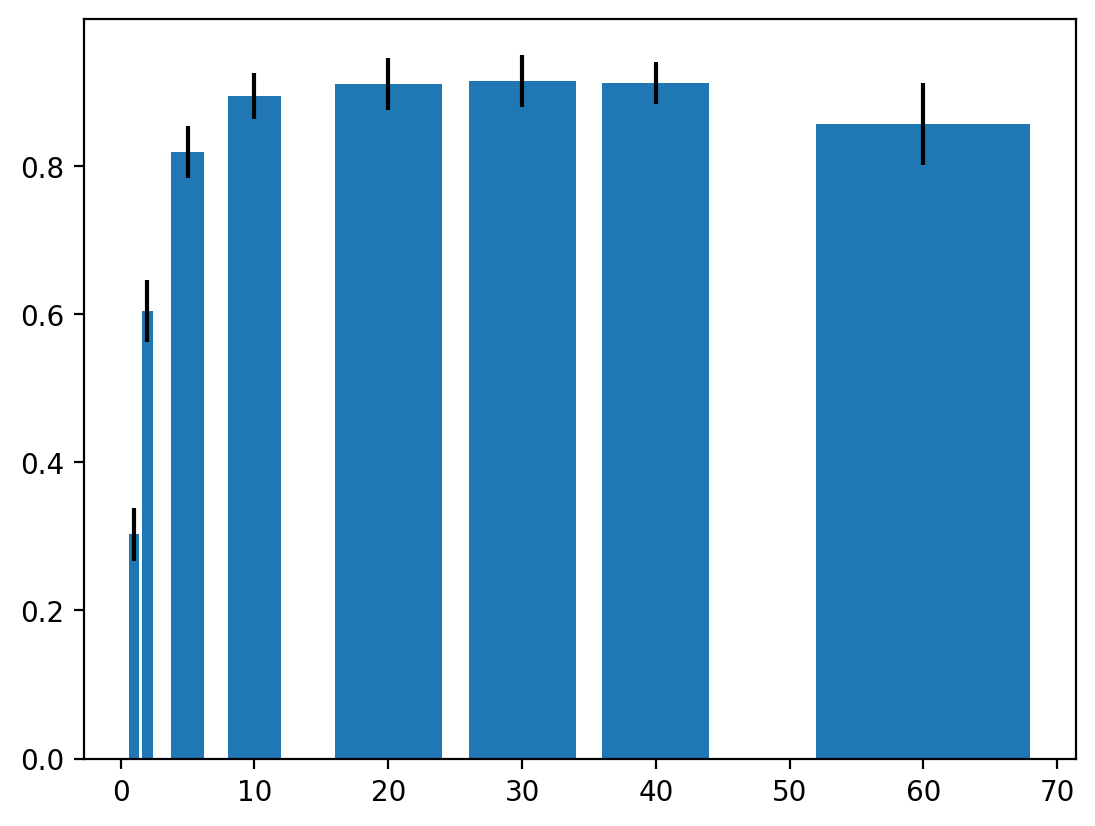

In [36]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)

param = search.cv_results_["param_pca__n_components"]

plt.bar(
    search.cv_results_["param_pca__n_components"],
    search.cv_results_["mean_test_score"],
    yerr=search.cv_results_["std_test_score"],
    width=0.8
    * np.diff(search.cv_results_["param_pca__n_components"].data, prepend=0),
)
plt.show()

## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

<span style="color:red">Implement your solution below and comment briefly</span>

---